In [1]:
import os
import sys

In [2]:
from maquinas.regular.rg import RegularGrammar as RG

In [3]:
# https://en.wikipedia.org/wiki/Regular_grammar#Examples
aes_b_ces=RG('S → aS; S → bA; A → ε; A → cA') #a*bc*

In [4]:
aes_b_ces.V

{'A', 'S'}

In [5]:
aes_b_ces.sigma

{'a', 'b', 'c'}

In [6]:
aes_b_ces.P

{'S': [['a', 'S'], ['b', 'A']], 'A': [['ε'], ['c', 'A']]}

In [7]:
s="aaa b ccc"
aes_b_ces.tokenize(s)

['a', 'a', 'a', 'b', 'c', 'c', 'c']

In [8]:
roots,chart,forest=aes_b_ces.parse(s)

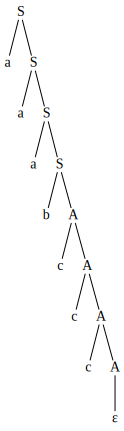

In [9]:
trees=aes_b_ces.extract_trees(forest)
aes_b_ces.graph_trees(trees)

In [14]:
for i,step in enumerate(aes_b_ces.derivation(list(aes_b_ces.extract_trees(forest))[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

S ⇒  aS
  ⇒  aS
  ⇒  aaS
  ⇒  aaS
  ⇒  aaaS
  ⇒  aaaS
  ⇒  aaabA
  ⇒  aaabA
  ⇒  aaabcA
  ⇒  aaabcA
  ⇒  aaabccA
  ⇒  aaabccA
  ⇒  aaabcccA
  ⇒  aaabcccA
  ⇒  aaabcccε
  ⇒  aaabcccε
 

In [15]:
aes_b_ces=RG("""
    S → A;
    A → aA;
    A → B;
    B → bC;
    C → ε;
    C → cC
""")

In [16]:
s="aaaaaaaaaabccccccc"
roots,chart,forest=aes_b_ces.parse(s)
print(f'Con "{s}" Se acepta?', "Sí" if len(roots)>0 else "No" )

Con "aaaaaaaaaabccccccc" Se acepta? Sí


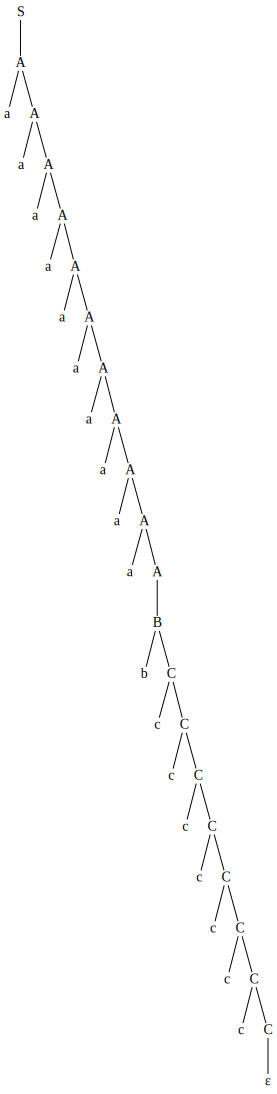

In [17]:
trees=aes_b_ces.extract_trees(forest)
aes_b_ces.graph_trees(trees)

In [18]:
float_number=RG("""
S → +A;
A → 0A;
B → 0C;
C → 0C;
D → +E;
E → 0F;
F → 0F;
S → -A;
A → 1A;
B → 1C;
C → 1C;
D → -E;
E → 1F;
F → 1F;
S → A;
A → 2A;
B → 2C;
C → 2C;
D → E;
E → 2F;
F → 2F;
A → 3A;
B → 3C;
C → 3C;
E → 3F;
F → 3F;
A → 4A;
B → 4C;
C → 4C;
E → 4F;
F → 4F;
A → 5A;
B → 5C;
C → 5C;
E → 5F;
F → 5F;
A → 6A;
B → 6C;
C → 6C;
E → 6F;
F → 6F;
A → 7A;
B → 7C;
C → 7C;
E → 7F;
F → 7F;
A → 8A;
B → 8C;
C → 8C;
E → 8F;
F → 8F;
A → 9A;
B → 9C;
C → 9C;
E → 9F;
F → 9F;
A → .B;
C → eD;
F → ε;
A → B;
C → ε
""")

In [27]:
s="-0.19e-10"
roots,chart,forest=float_number.parse(s)
print(f'Con "{s}" Se acepta?', "Sí" if len(roots)>0 else "No" )

Con "-0.19e-10" Se acepta? Sí


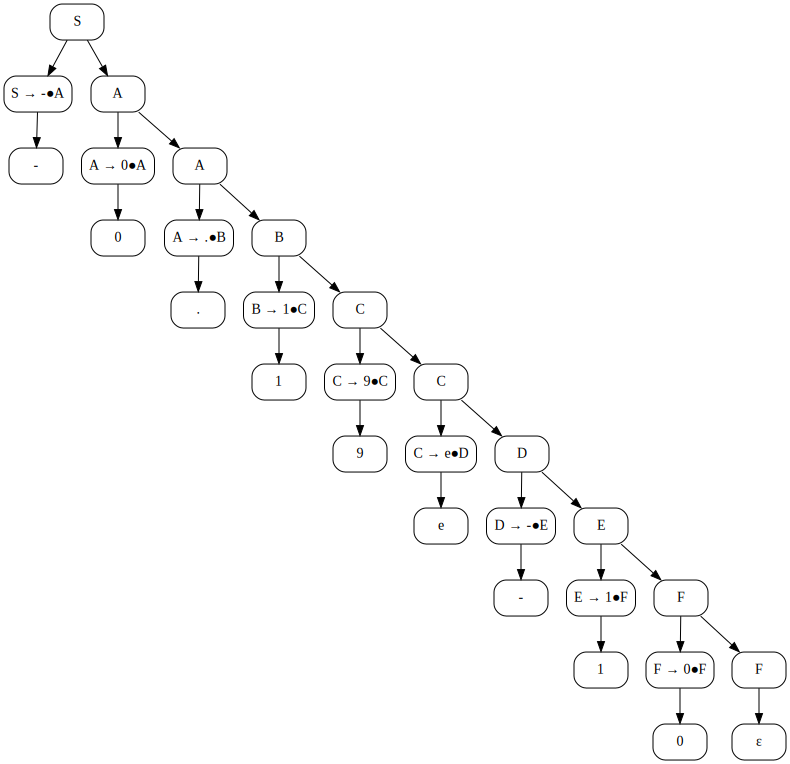

In [32]:
aes_b_ces.graph_forest(forest)

In [41]:
trees=aes_b_ces.extract_trees(forest,max_ancesters=60)
aes_b_ces.graph_trees(trees)